In [5]:
from datascience import *
import numpy as np

%matplotlib inline

# Apply with Multiple Arguments

In [16]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [18]:
# one agrument function
def cut_off_at_a_billion(x):
    '''The smaller fo x and 1,000,000,000'''
    return min(x,1e9)

cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
top.with_column('Cut Off',cut_off)

Title,Studio,Gross,Gross (Adjusted),Year,Cut Off
Gone with the Wind,MGM,198676459,1796176700,1939,1e+09
Star Wars,Fox,460998007,1583483200,1977,1e+09
The Sound of Music,Fox,158671368,1266072700,1965,1e+09
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1e+09
Titanic,Paramount,658672302,1204368000,1997,1e+09
The Ten Commandments,Paramount,65500000,1164590000,1956,1e+09
Jaws,Universal,260000000,1138620700,1975,1e+09
Doctor Zhivago,MGM,111721910,1103564200,1965,1e+09
The Exorcist,Warner Brothers,232906145,983226600,1973,9.83227e+08
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,9.6901e+08


In [19]:
# two agrument function
def gross_adjusted_difference(x,y):
    '''The difference between gross adjusted and gross'''
    return x - y

diff = top.apply(gross_adjusted_difference, 'Gross (Adjusted)', 'Gross')
top.with_column('Adjusted Difference',diff)

Title,Studio,Gross,Gross (Adjusted),Year,Adjusted Difference
Gone with the Wind,MGM,198676459,1796176700,1939,1597500241
Star Wars,Fox,460998007,1583483200,1977,1122485193
The Sound of Music,Fox,158671368,1266072700,1965,1107401332
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,825974446
Titanic,Paramount,658672302,1204368000,1997,545695698
The Ten Commandments,Paramount,65500000,1164590000,1956,1099090000
Jaws,Universal,260000000,1138620700,1975,878620700
Doctor Zhivago,MGM,111721910,1103564200,1965,991842290
The Exorcist,Warner Brothers,232906145,983226600,1973,750320455
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,784084514


# Group

In [30]:
all_cones = Table.read_table('cones.csv')
cones = all_cones.drop('Color').exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [31]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [32]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,15.25
strawberry,8.8


In [33]:
# what if you have more than one column?
top.group('Studio',sum)

Studio,Title sum,Gross sum,Gross (Adjusted) sum,Year sum
AVCO,,104945305,760778000,1967
Buena Vista,,12370356892,15986095561,70204
Columbia,,860425219,4126215300,17730
Disney,,1100688229,7106396400,21487
Dreamworks,,925432167,1458747900,6003
Fox,,5569320061,14944310800,47607
IFC,,241438208,368219200,2002
Lionsgate,,1169814624,1268645700,6039
MGM,,704168476,5517613900,13743
Metro,,9183673,408214300,1921


In [35]:
top.group('Year',sum)

Year,Title sum,Studio sum,Gross sum,Gross (Adjusted) sum
1921,,,9183673,408214300
1937,,,184925486,969010000
1939,,,198676459,1796176700
1940,,,84254167,599215600
1941,,,92769982,1166071700
1942,,,102247150,566403700
1945,,,21333333,557803900
1946,,,44058163,942521400
1950,,,93141149,536079700
1952,,,36000000,533400000


In [34]:
cones.group('Flavor', list)

Flavor,Price list
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.55, 5.25]"


In [48]:
# can do the same thing with where -- but so much harder!
row1 = cones.where('Flavor','chocolate').column('Price').sum()
row2 = cones.where('Flavor','strawberry').column('Price').sum()

Table().with_columns('Flavor',['chocolate','strawbery'],'Price sum',[row1,row2])

Flavor,Price sum
chocolate,15.25
strawbery,8.8


In [49]:
cones.group('Flavor', np.mean)

Flavor,Price mean
chocolate,5.08333
strawberry,4.4


In [50]:
# can actually do this w/ any function that takes in an array and returns a single number!
cones.group('Flavor', np.max)

# could even write your own functions, gives a lot of flexability

Flavor,Price amax
chocolate,5.25
strawberry,5.25


In [56]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled("'15-'16 SALARY","SALARY")

In [96]:
np.unique(nba.column('TEAM'))

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype='<U22')

In [57]:
nba.group('TEAM',sum)

TEAM,PLAYER sum,POSITION sum,SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307
Charlotte Hornets,,,84.1024
Chicago Bulls,,,78.8209
Cleveland Cavaliers,,,102.312
Dallas Mavericks,,,65.7626
Denver Nuggets,,,62.4294
Detroit Pistons,,,42.2118
Golden State Warriors,,,94.0851


In [61]:
nba.select('TEAM','SALARY').group('TEAM',sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


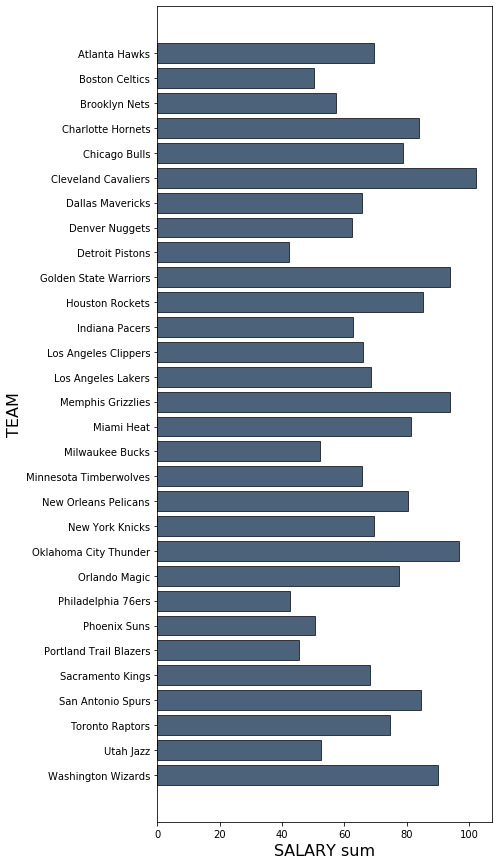

In [62]:
nba.select('TEAM','SALARY').group('TEAM',sum).barh('TEAM')

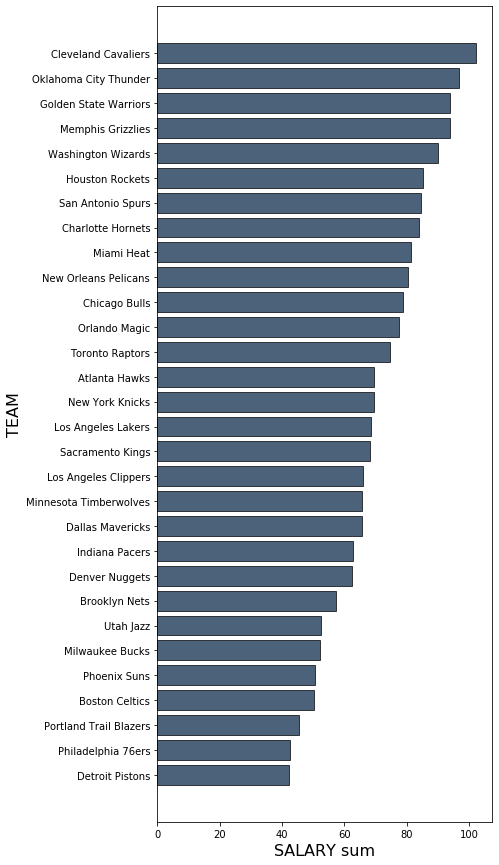

In [63]:
(nba.select('TEAM','SALARY')
 .group('TEAM',sum)
 .sort(1,descending=True)
 .barh('TEAM'))

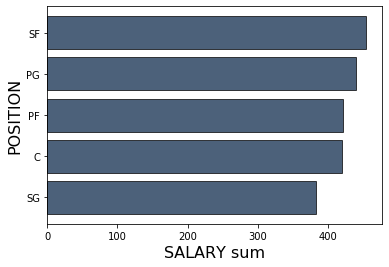

In [67]:
# could also group by position!
(nba.select('POSITION','SALARY')
 .group('POSITION',sum)
 .sort(1,descending=True)
 .barh('POSITION'))

# but sum is maybe weird

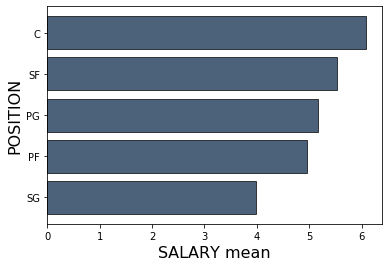

In [68]:
(nba.select('POSITION','SALARY')
 .group('POSITION',np.mean)
 .sort(1,descending=True)
 .barh('POSITION'))

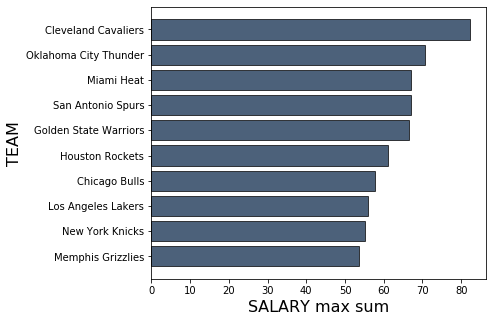

In [77]:
# Discussion: assume that the players that make the most in every position are the starters
# for each team
starters = nba.select('TEAM','POSITION','SALARY').group(make_array('TEAM','POSITION'), max)

# how do I find out which team pays the most money for their starters?
(starters.select('TEAM','SALARY max')
 .group('TEAM',sum)
 .sort(1, descending=True)
 .take(np.arange(10)).barh(0))

# Pivot

In [91]:
team_position_salaries = nba.select('TEAM','POSITION','SALARY')
team_position_salaries

TEAM,POSITION,SALARY
Atlanta Hawks,PF,18.6717
Atlanta Hawks,C,12
Atlanta Hawks,C,9.75625
Atlanta Hawks,PG,8
Atlanta Hawks,SG,5.74648
Atlanta Hawks,SF,4
Atlanta Hawks,PF,3.33333
Atlanta Hawks,SF,2
Atlanta Hawks,PG,1.7634
Atlanta Hawks,SG,1.30452


In [95]:
team_position_salaries.pivot('POSITION','TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [93]:
team_position_salaries.pivot('POSITION','TEAM',values='SALARY',collect=sum)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,22.7563,22.005,9.7634,6,9.04846
Boston Celtics,7.3514,6.17096,19.8986,8.83432,8.03022
Brooklyn Nets,1.3629,13.3575,7.8,26.0806,8.70589
Charlotte Hornets,20.3167,14.0573,17.9412,7.53284,24.2543
Chicago Bulls,20.8488,6.93489,22.3431,3.91632,24.7779
Cleveland Cavaliers,31.0094,19.689,19.6548,22.9705,8.98876
Dallas Mavericks,6.47096,23.827,17.6727,15.3615,2.43035
Denver Nuggets,10.4652,14.05,7.44724,28.7831,1.6839
Detroit Pistons,12.2721,0,13.913,6.86486,9.16176
Golden State Warriors,19.6237,21.5591,16.9145,17.9868,18.001


In [94]:
nba.select('TEAM','POSITION','SALARY').group(make_array('TEAM','POSITION'), sum)

TEAM,POSITION,SALARY sum
Atlanta Hawks,C,22.7563
Atlanta Hawks,PF,22.005
Atlanta Hawks,PG,9.7634
Atlanta Hawks,SF,6
Atlanta Hawks,SG,9.04846
Boston Celtics,C,7.3514
Boston Celtics,PF,6.17096
Boston Celtics,PG,19.8986
Boston Celtics,SF,8.83432
Boston Celtics,SG,8.03022


# Prediction

In [2]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


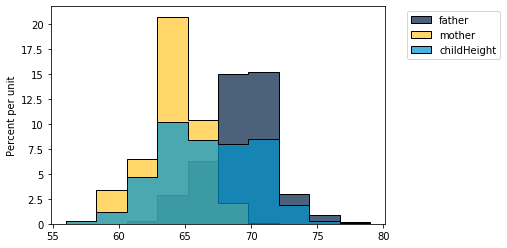

In [6]:
# Given that a father is 78.5" tall, and mother is 67" tall
# how tall will the children be?
galton.select(1,2,7).hist()

In [ ]:
# why are the father and mother bars taller?
# adults --> more dense; children --> more spread out
# genders are mixed together

In [7]:
# galton said: 'i think avg of parents height --> child height'
heights = galton.select(3,7).relabeled(0,'MidParent').relabeled(1,'Child')

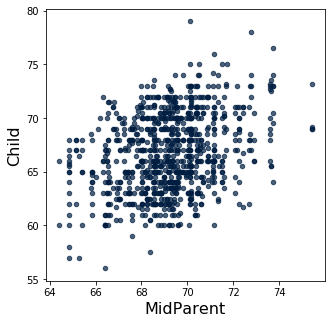

In [8]:
heights.scatter(0)

In [9]:
# what will my child height be if midparent height is 68?
# something a bit simpler than regression

close_to_68 = heights.where('MidParent',are.between(67.5,68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [10]:
close_to_68.column(1).mean()

66.24045801526718

In [11]:
def predict_child(mp):
    close_points = heights.where('MidParent', are.between(mp-0.5, mp+0.5))
    return close_points.column('Child').mean()

In [12]:
predict_child(70)

67.27285067873302

In [13]:
preds = heights.apply(predict_child,'MidParent')

In [14]:
heights_with_predictions = heights.with_columns(
    'Prediction',preds
)

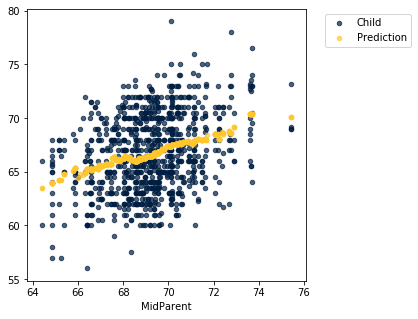

In [15]:
heights_with_predictions.scatter('MidParent')

# Combining Everything We Know

Is there a relationship between how much a team wins and how much they're paying players?

There's a CSV nba_win_loss.csv that has the wins and losses for each team.

Use that and the data analysis and visualization skills you've learned in class to determine whether $ paid corresponds to win success. What about amount paid per position? Are there positions it seems more useful to pay people more?